# Using Foursquare to predict land prices in São Paulo

_Capstone project for the IBM Professional Data Science Certification program_

In this project we use Foursquare venue locations associated with publicly available land value data to create a model to predict land prices using Regression algorithms.

## Introduction

It is known that close-by amenities can have an impact on land prices. This project intends to cross information already known from land prices in the city of São Paulo with Foursquare venue locations, in order to create a model capable of predicting land prices for a given location in the city.

The following objectives will be pursued by this work:
- Extract statistics and create land price visualizations from public available data on land value;
- Create a simple regression model to predict land prices based on this public data;
- Improve this model by adding venue locations extracted from the Foursquare API;
- Measure and compare the efficiency of each model.

The main beneficiaries from this report will be real estate investors and agents followed by anyone searching for a good place to live in the city. Also, it adds value to the Data Science community as a whole as the result of the conducted research will contribute to evaluate if the use of Foursquare data can benefit other land price prediction models.

## Data

To perform this research, two main datasets will be used:

### [Public data from São Paulo's city hall related with land value in the city](http://dados.prefeitura.sp.gov.br/dataset/base-de-dados-do-imposto-predial-e-territorial-urbano-iptu)
The city Hall of São Paulo has made available data regarding to the land taxes paid in the city. In this data there's also interesting data about the land value by m2 for different neighbourhoods in the city. 

The table below is an example of this data, where columns "BAIRRO DO IMOVEL" and "VALOR DO M2 DO TERRENO" show neighbourhood and the land value by m2, respectively.

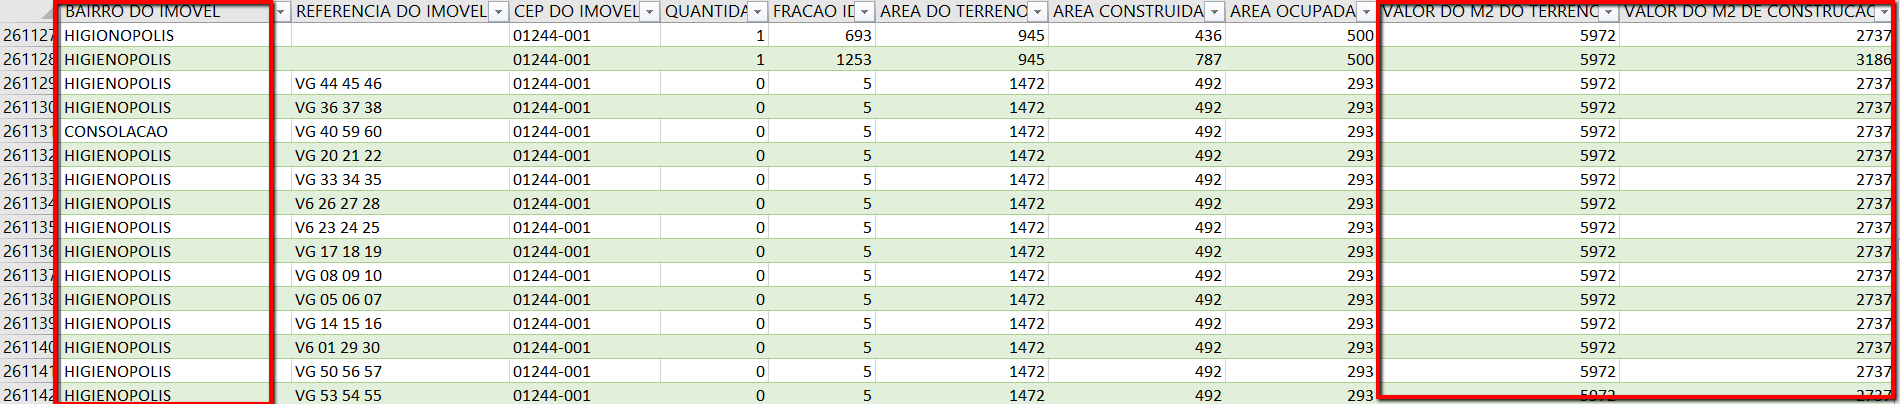


### [Foursquare API](https://developer.foursquare.com/docs) to retrieve venue locations
 
Foursquare holds the location for venues in different categories (bars, cinemas, supermarkets, museums, etc). A location in São Paulo can have many of these different venues, as shown in the image below:
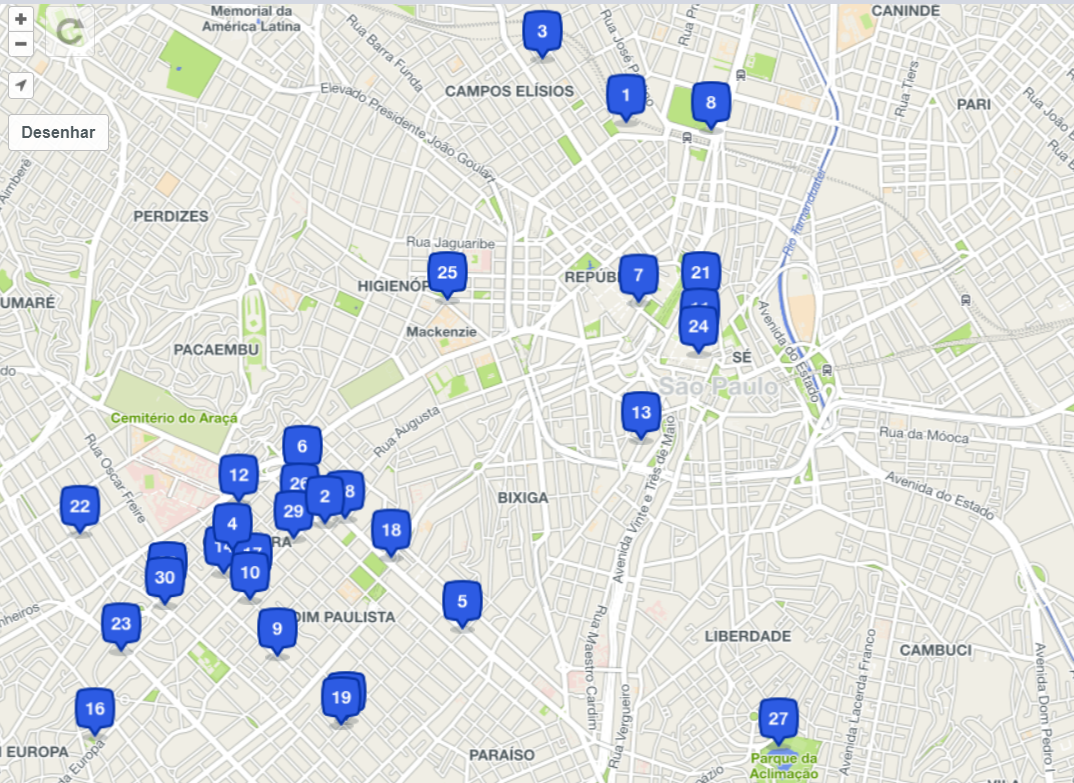

By accessing the Foursquare API one can obtain the venue's data in a convenient JSON like below:

```
[{"id": "4b6da9b6f964a5204c842ce3",
  "name": "Estação Sé (Metrô)",
  "location": {"address": "Pç. da Sé, S/N",
   "crossStreet": "Linha 1/Azul, 3/Vermelha",
   "lat": -23.550561852202886,
   "lng": -46.63299793807663,
   "labeledLatLngs": [{"label": "display",
     "lat": -23.550561852202886,
     "lng": -46.63299793807663}],
   "distance": 21,
   "postalCode": "01508-030",
   "cc": "BR",
   "city": "São Paulo",
   "state": "SP",
   "country": "Brasil",
   "formattedAddress": ["Pç. da Sé, S/N (Linha 1/Azul, 3/Vermelha)",
    "São Paulo, SP",
    "01508-030",
    "Brasil"]},
  "categories": [{"id": "4bf58dd8d48988d1fd931735",
    "name": "Metro Station",
    "pluralName": "Metro Stations",
    "shortName": "Metro",
    "icon": {"prefix": "https://ss3.4sqi.net/img/categories_v2/travel/subway_",
     "suffix": ".png"},
    "primary": true}],
  "referralId": "v-1564281331",
  "hasPerk": false}
  ]
```


### Import required libraries

In [1]:
!conda install -c conda-forge folium=0.10.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.10.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be

In [2]:
!conda install fiona pyproj six
!pip install geopandas
!conda upgrade --all

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - fiona
    - pyproj
    - six


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kealib-1.4.7               |       hd0c454d_6         175 KB
    poppler-0.65.0             |       h581218d_1         1.6 MB
    munch-2.3.2                |           py36_0          13 KB
    libnetcdf-4.6.1            |       h11d0813_2         1.3 MB
    gdal-2.3.3                 |   py36hbb2a789_0         1.3 MB
    hdf4-4.2.13                |       h3ca952b_2         916 KB
    freexl-1.0.5               |       h14c3975_0          44 KB
    xerces-c-3.2.2             |       h780794e_0         3.2 MB
    shapely-1.6.4              |   py36h86c5351_0         330 KB
    poppler-data-0.4.9         |                0         3.5 MB
    click-plugins-1.1.1        |             p

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from pandas.plotting import scatter_matrix
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import folium
import types
import os
import json
import requests
from botocore.client import Config
import ibm_boto3
from urllib.request import urlopen
import urllib.parse

In [4]:
# The code was removed by Watson Studio for sharing.

### Import land value data

Import the data obtained from São Paulo's City Hall website. 

In [47]:
def __iter__(self): return 0

def loadLandValueData():
    dfs = []
    for i in range(1, 5):
      filename = 'iptu_part' + str(i) + '.csv'
      body = client_93b20a0e90b54e3c9d0d700a2bf9329c.get_object(Bucket='usingfoursquaretopredictlandvalue-donotdelete-pr-z9iaiiaobxybrj',Key=filename)['Body']
      if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
      df_data = pd.read_csv(body, encoding='cp1252')
      dfs.append(df_data)
    return pd.concat(dfs, sort=True)

In [57]:
landvalueDF = loadLandValueData()
landvalueDF.shape

(3219739, 19)

Discard some columns that will not be relevant and translate the remaining columns:

In [58]:
landvalueDF.drop(columns=[   
    'CEP DO IMOVEL',
    'COMPLEMENTO DO IMOVEL',
    'NOME DE LOGRADOURO DO IMOVEL',
    'NUMERO DO IMOVEL',
    'REFERENCIA DO IMOVEL'
], inplace=True)

In [59]:
landvalueDF.rename(columns={
    'ANO DA CONSTRUCAO CORRIGIDO':'CONSTRUCTION YEAR',
    'AREA CONSTRUIDA':'CONSTRUCTED AREA',
    'AREA DO TERRENO':'TOTAL AREA',
    'AREA OCUPADA':'SOIL OCCUPATION',
    'BAIRRO DO IMOVEL':'NEIGHBOURHOOD',
    'FATOR DE OBSOLESCENCIA':'OBSOLESCENCE FACTOR',
    'FRACAO IDEAL':'MINIMUN FRACTION',
    'QUANTIDADE DE ESQUINAS/FRENTES':'NUMBER OF FACADES',
    'QUANTIDADE DE PAVIMENTOS':'NUMBER OF FLOORS',
    'TIPO DE PADRAO DA CONSTRUCAO':'CONSTRUCTION TYPE',
    'TIPO DE TERRENO':'LAND POSITION',
    'TIPO DE USO DO IMOVEL':'TYPE',    
    'VALOR DO M2 DE CONSTRUCAO':'CONSTRUCTED M2 PRICE',
    'VALOR DO M2 DO TERRENO':'BARE M2 PRICE'
}, inplace=True)

In [60]:
districts = ["BELA VISTA","LIBERDADE","PARI","MOOCA","VILA ANDRADE","CAMBUCI","ITAIM BIBI","CONSOLACAO","PINHEIROS","VILA LEOPOLDINA","CAMPO LIMPO","MORUMBI","IPIRANGA","RAPOSO TAVARES","JARDIM PAULISTA","RIO PEQUENO","ALTO DE PINHEIROS","CURSINO","REPUBLICA","JABAQUARA","BELEM","CIDADE ADEMAR","CAMPO BELO","VILA MARIANA","VILA PRUDENTE","VILA GUILHERME","SANTANA","PERDIZES","VILA FORMOSA","SANTO AMARO","LAPA","SE","ERMELINO MATARAZZO","CASA VERDE","ANHANGUERA","VILA MEDEIROS","VILA MARIA","PERUS","BARRA FUNDA","MANDAQUI","ARICANDUVA","TUCURUVI","PENHA","SAPOPEMBA","PIRITUBA","CACHOEIRINHA","MOEMA","PARQUE DO CARMO","IGUATEMI","VILA MATILDE","ARTUR ALVIM","ITAQUERA","PONTE RASA","VILA JACUI","JAGUARA","LAJEADO","GUAIANASES","CIDADE TIRADENTES","ITAIM PAULISTA","CARRAO","JARDIM HELENA","PARELHEIROS","MARSILAC","SOCORRO","PEDREIRA","CIDADE DUTRA","CAMPO GRANDE","BOM RETIRO","VILA SONIA","JAGUARE","JARDIM SAO LUIS","JARDIM ANGELA","AGUA RASA","CAPAO REDONDO","LIMAO","SACOMA","SAUDE","SANTA CECILIA","TATUAPE","SAO LUCAS","BUTANTA","SAO DOMINGOS","JARAGUA","BRAS","FREGUESIA DO O","BRASILANDIA","TREMEMBE","JACANA","CANGAIBA","CIDADE LIDER","SAO MATEUS","SAO RAFAEL","JOSE BONIFACIO","SAO MIGUEL","GRAJAU","VILA CURUCA"]
landvalueDF = landvalueDF[landvalueDF['NEIGHBOURHOOD'].isin(districts)]

landvalueDF['M2 PRICE'] = (landvalueDF['CONSTRUCTED M2 PRICE'] + landvalueDF['BARE M2 PRICE']) / 2
landvalueDF.drop(columns=[
    'CONSTRUCTED M2 PRICE',
    'BARE M2 PRICE'
], inplace=True)

landvalueDF.head()

CONSTRUCTION YEAR  CONSTRUCTED AREA  TOTAL AREA  SOIL OCCUPATION  \
5                 1954              1804         310              285   
170               1924               100         116               92   
296               1970               280         148              140   
344               1970               300         200              150   
411               1961               175         300              155   

    NEIGHBOURHOOD  OBSOLESCENCE FACTOR  MINIMUN FRACTION  NUMBER OF FACADES  \
5      BOM RETIRO                    2                 1                  0   
170    BOM RETIRO                    2                 1                  0   
296       SANTANA                   46                 1                  2   
344   BARRA FUNDA                   46                 1                  0   
411    BOM RETIRO                    3                13                  0   

     NUMBER OF FLOORS                  CONSTRUCTION TYPE  \
5                   8    Residencial vertical - padrão C   
170                 1  Residencial horizontal - padrão C   
296                 2    Comercial horizontal - padrão B   
344                 2    Comercial horizontal - padrão B   
411                 7      Comercial vertical - padrão B   

               LAND POSITION  \
5                     Normal   
170                   Normal   
296  De duas ou mais frentes   
344                   Normal   
411                   Normal   

                                                  TYPE  M2 PRICE  
5    Prédio de apartamento, não em condomínio, de u...    1939.0  
170                                         Residência    1257.5  
296                                               Loja    1225.0  
344        Loja e residência (predominância comercial)    1208.0  
411  Loja em edifício em condomínio (unidade autônoma)    1410.5

Let's examine our data:

In [61]:
landvalueDF['M2 PRICE'].astype(str).value_counts()

1802.0    2400
581.0     1254
2128.5    1146
742.0     1056
1154.0    1047
          ... 
4577.5       1
2681.0       1
3801.5       1
5060.0       1
3293.0       1
Name: M2 PRICE, Length: 8283, dtype: int64

In [62]:
landvalueDF.sort_values(by ='M2 PRICE', ascending=False).head(10)

CONSTRUCTION YEAR  CONSTRUCTED AREA  TOTAL AREA  SOIL OCCUPATION  \
165166               2002               472        2088             1749   
165169               2002               472        2088             1749   
165168               2002               472        2088             1749   
165171               2002               472        2088             1749   
165172               2002               472        2088             1749   
165167               2002               472        2088             1749   
165145               2002               472        2088             1749   
165148               2002               472        2088             1749   
165149               2002               472        2088             1749   
165150               2002               472        2088             1749   

       NEIGHBOURHOOD  OBSOLESCENCE FACTOR  MINIMUN FRACTION  \
165166    BELA VISTA                   88               245   
165169    BELA VISTA                   88               245   
165168    BELA VISTA                   88               245   
165171    BELA VISTA                   88               245   
165172    BELA VISTA                   88               245   
165167    BELA VISTA                   88               245   
165145    BELA VISTA                   88               245   
165148    BELA VISTA                   88               245   
165149    BELA VISTA                   88               245   
165150    BELA VISTA                   88               245   

        NUMBER OF FACADES  NUMBER OF FLOORS              CONSTRUCTION TYPE  \
165166                  1                19  Comercial vertical - padrão E   
165169                  1                19  Comercial vertical - padrão E   
165168                  1                19  Comercial vertical - padrão E   
165171                  1                19  Comercial vertical - padrão E   
165172                  1                19  Comercial vertical - padrão E   
165167                  1                19  Comercial vertical - padrão E   
165145                  1                19  Comercial vertical - padrão E   
165148                  1                19  Comercial vertical - padrão E   
165149                  1                19  Comercial vertical - padrão E   
165150                  1                19  Comercial vertical - padrão E   

       LAND POSITION                                               TYPE  \
165166    De esquina  Escritório/consultório em condomínio (unidade ...   
165169    De esquina  Escritório/consultório em condomínio (unidade ...   
165168    De esquina  Escritório/consultório em condomínio (unidade ...   
165171    De esquina  Escritório/consultório em condomínio (unidade ...   
165172    De esquina  Escritório/consultório em condomínio (unidade ...   
165167    De esquina  Escritório/consultório em condomínio (unidade ...   
165145    De esquina  Escritório/consultório em condomínio (unidade ...   
165148    De esquina  Escritório/consultório em condomínio (unidade ...   
165149    De esquina  Escritório/consultório em condomínio (unidade ...   
165150    De esquina  Escritório/consultório em condomínio (unidade ...   

        M2 PRICE  
165166   14137.0  
165169   14137.0  
165168   14137.0  
165171   14137.0  
165172   14137.0  
165167   14137.0  
165145   14137.0  
165148   14137.0  
165149   14137.0  
165150   14137.0

## Plot Mean Neighbourhood prices in a Choroplet Map
Load districts GEOJSON and plot Choroplet.

In [40]:
urlGeoJson = 'https://raw.githubusercontent.com/guilhermelemmi/landvalue-sp/master/data/distritos_sp.json'
geojsonFile = urlopen(urlGeoJson)
geojson = json.loads(geojsonFile.read())

In [41]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(meanLandvalueDF['M2 PRICE'].min(),
                              meanLandvalueDF['M2 PRICE'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

map = folium.Map(location=[-23.549896, -46.631258], zoom_start=12)

folium.Choropleth(
    geo_data=geojson,
    data=meanLandvalueDF,
    columns=['NEIGHBOURHOOD', 'M2 PRICE'],
    key_on='feature.properties.nomecaps',
    threshold_scale=threshold_scale,
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Sao Paulo land value',
).add_to(map)

folium.LayerControl().add_to(map)
map

In [63]:
landvalueDF.dtypes

CONSTRUCTION YEAR        int64
CONSTRUCTED AREA         int64
TOTAL AREA               int64
SOIL OCCUPATION          int64
NEIGHBOURHOOD           object
OBSOLESCENCE FACTOR      int64
MINIMUN FRACTION         int64
NUMBER OF FACADES        int64
NUMBER OF FLOORS         int64
CONSTRUCTION TYPE       object
LAND POSITION           object
TYPE                    object
M2 PRICE               float64
dtype: object

In [26]:
landvalueDF.head()

CONSTRUCTION YEAR  CONSTRUCTED AREA  TOTAL AREA  SOIL OCCUPATION  \
0               1924               135         136              108   
1               1944                67          90               67   
2               1965               140         105               84   
3               1944               103         108               86   
4               1944                98         120               96   

    NEIGHBOURHOOD  OBSOLESCENCE FACTOR  MINIMUN FRACTION  NUMBER OF FACADES  \
0  SANTA EFIGENIA                    2                 1                  1   
1  SANTA EFIGENIA                    2                 1                  0   
2  SANTA EFIGENIA                   37                 1                  0   
3             NaN                    2                 1                  0   
4             NaN                    2                 1                  0   

   NUMBER OF FLOORS                CONSTRUCTION TYPE LAND POSITION  TYPE  \
0                 1  Comercial horizontal - padrão B    De esquina  Loja   
1                 1  Comercial horizontal - padrão B        Normal  Loja   
2                 2  Comercial horizontal - padrão B        Normal  Loja   
3                 1  Comercial horizontal - padrão B        Normal  Loja   
4                 1  Comercial horizontal - padrão B        Normal  Loja   

   CONSTRUCTED M2 PRICE  BARE M2 PRICE  
0                  1478           1984  
1                  1478           1984  
2                  1478           1984  
3                  1478           1984  
4                  1478           1984

We can create a new column M2 PRICE and let it be the mean between the CONSTRUCTED M2 PRICE and	BARE M2 PRICE. This will be our prediction target.

In [28]:
landvalueDF.dtypes

CONSTRUCTION YEAR        int64
CONSTRUCTED AREA         int64
TOTAL AREA               int64
SOIL OCCUPATION          int64
NEIGHBOURHOOD           object
OBSOLESCENCE FACTOR      int64
MINIMUN FRACTION         int64
NUMBER OF FACADES        int64
NUMBER OF FLOORS         int64
CONSTRUCTION TYPE       object
LAND POSITION           object
TYPE                    object
M2 PRICE               float64
dtype: object

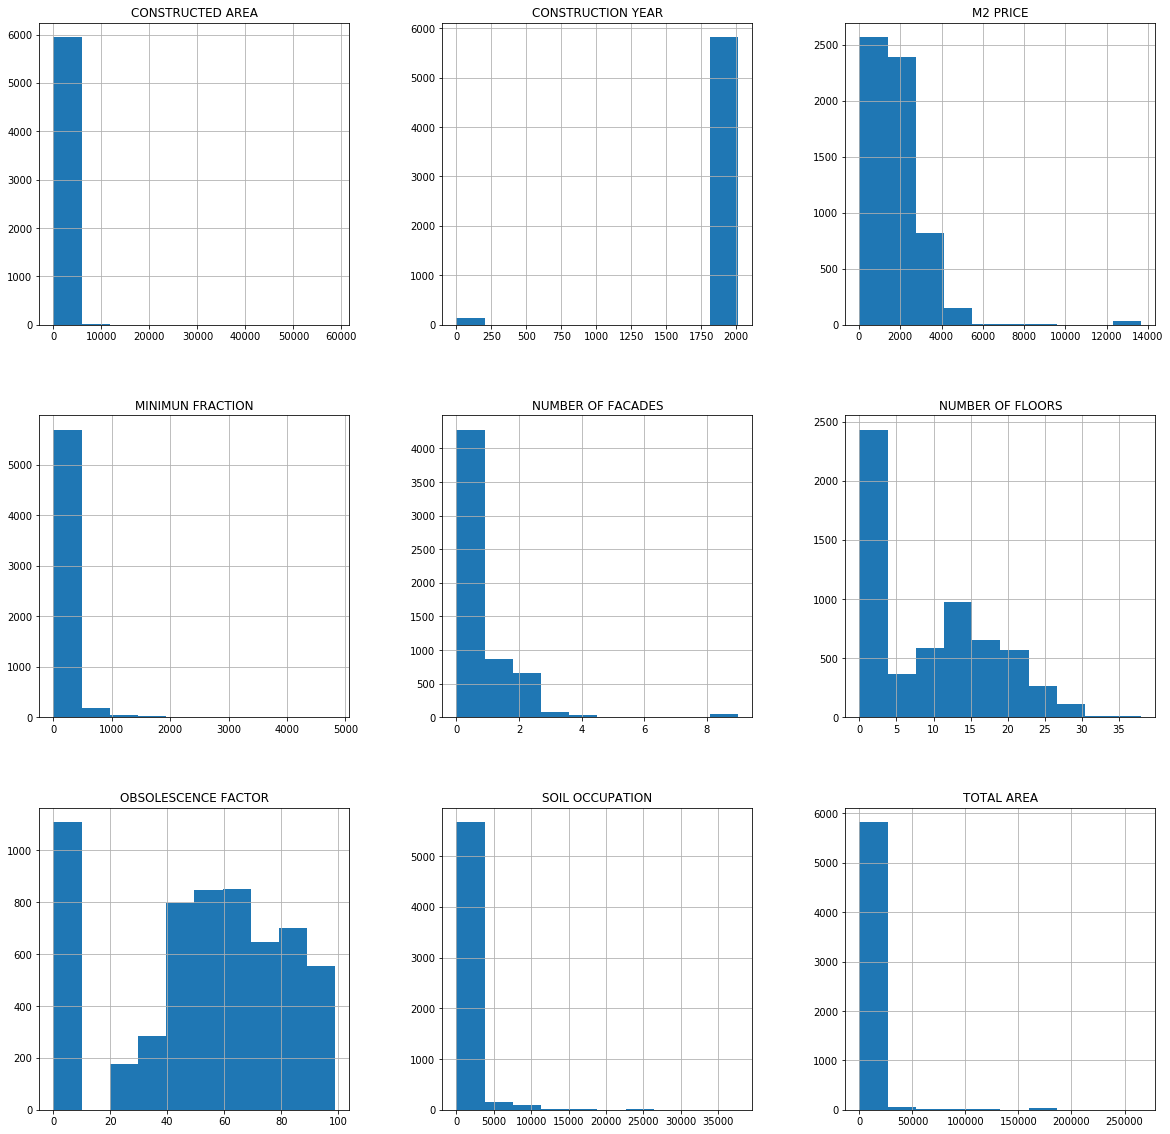

In [12]:
landvalueDF.hist(figsize=(20, 20));

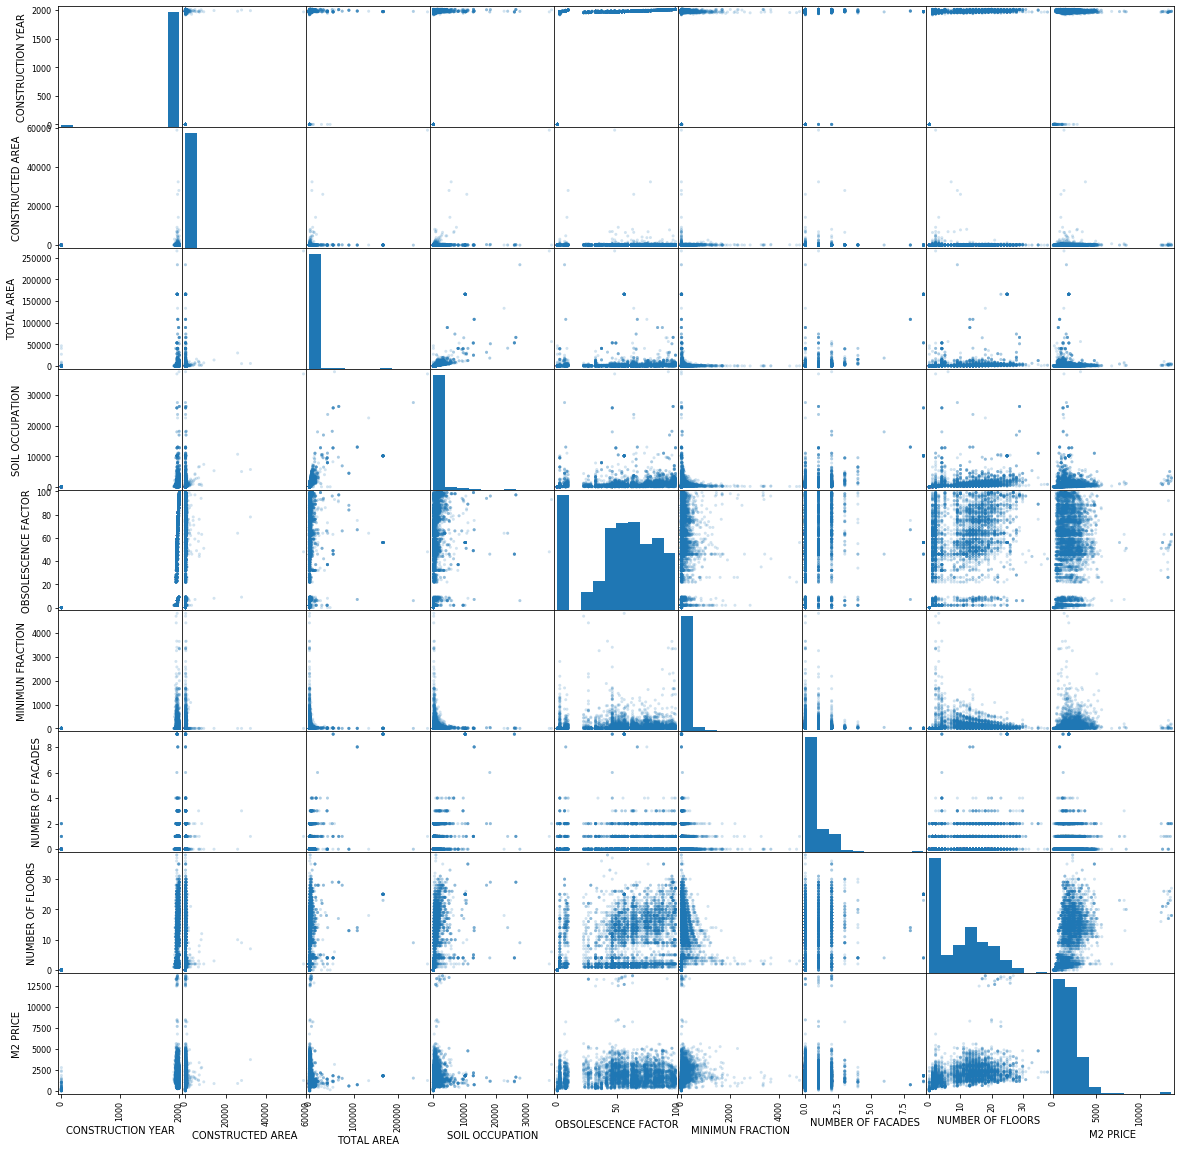

In [13]:
scatter_matrix(landvalueDF, alpha=0.2, figsize=(20, 20));

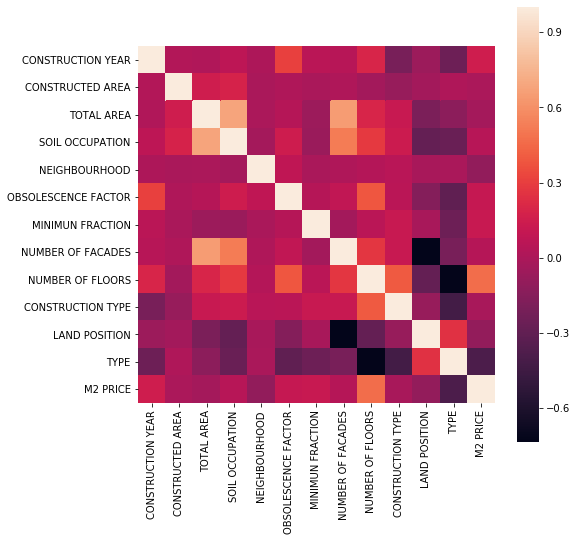

In [18]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(landvalueDF)
plt.figure(figsize=(8, 8));
sns.heatmap(encoded_data.corr(), square=True);
plt.show()

In [19]:
landvalueDF[['NUMBER OF FLOORS', 'M2 PRICE']].sample(10)

NUMBER OF FLOORS  M2 PRICE
528924                 1     639.5
828543                12     607.5
551552                 2     649.0
587762                 4    1364.0
310762                 2    2113.0
590437                 2    1728.5
404138                 0    1018.0
88486                  2    1060.5
504151                 4     779.0
293049                 2    2062.0

In [20]:
landvalueDF[['TYPE', 'M2 PRICE']].sample(10)

TYPE  M2 PRICE
159357  Garagem (unidade autônoma) em edifício em cond...    3220.0
33169                                          Residência     798.5
694113  Residência coletiva, exclusive cortiço (mais d...    2173.0
717080                          Apartamento em condomínio    1136.5
56978                           Apartamento em condomínio    1571.0
175548  Garagem (unidade autônoma) em edifício em cond...    3080.5
37949                           Apartamento em condomínio    2888.5
353509                          Apartamento em condomínio    1592.0
390821  Garagem (unidade autônoma) em edifício em cond...    1403.5
39833                           Apartamento em condomínio    3140.0

In [21]:
encoded_data.sample(10)

CONSTRUCTION YEAR  CONSTRUCTED AREA  TOTAL AREA  SOIL OCCUPATION  \
439109               2002                64        1347              984   
219120               1963                42        1720              860   
346717               1954               206         242              110   
668561               2013                33        2584             2051   
623868               1970               450         250              200   
610970               1966               111        2400              900   
459511               1990               120         991              928   
123755               1919               100         144              100   
224120               2010               409       51408            18191   
105363               1967                80         200               80   

        NEIGHBOURHOOD  OBSOLESCENCE FACTOR  MINIMUN FRACTION  \
439109             63                   88                79   
219120             24                   33                29   
346717             57                    2                 1   
668561             64                   98                14   
623868             12                   46                 1   
610970             44                   39                96   
459511             55                   75                16   
123755             24                    2                 1   
224120             10                   96                29   
105363             37                    2                 1   

        NUMBER OF FACADES  NUMBER OF FLOORS  CONSTRUCTION TYPE  LAND POSITION  \
439109                  0                14                  8              4   
219120                  0                15                 23              5   
346717                  0                 2                 17              4   
668561                  2                 8                  8              0   
623868                  0                 2                  4              4   
610970                  0                17                 23              4   
459511                  2                16                 23              0   
123755                  0                 1                 17              4   
224120                  2                29                 24              0   
105363                  0                 1                 15              3   

        TYPE  M2 PRICE  
439109     6    3939.5  
219120     0    2565.0  
346717    30    2779.5  
668561    11    1781.5  
623868    27    1502.0  
610970     0    1836.0  
459511     0    2295.0  
123755    28    2254.0  
224120     0    1157.0  
105363    28     714.5

In [17]:
encoded_data.dtypes

CONSTRUCTION YEAR        int64
CONSTRUCTED AREA         int64
TOTAL AREA               int64
SOIL OCCUPATION          int64
NEIGHBOURHOOD            int64
OBSOLESCENCE FACTOR      int64
MINIMUN FRACTION         int64
NUMBER OF FACADES        int64
NUMBER OF FLOORS         int64
CONSTRUCTION TYPE        int64
LAND POSITION            int64
TYPE                     int64
M2 PRICE               float64
dtype: object

In [22]:
# Split and scale the data
encoded_data, encoders = number_encode_features(landvalueDF)
X = encoded_data[['NUMBER OF FLOORS']]
y = encoded_data[['M2 PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = model.predict(X_test)

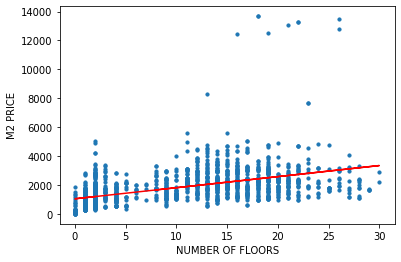

In [25]:
plt.scatter(X_test, y_test, s=10)
plt.xlabel('NUMBER OF FLOORS')
plt.ylabel('M2 PRICE')

# predicted values
plt.plot(X_test, y_pred, color='r')
plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

1403644.172479759

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1184.7548997492092

In [28]:
r2 = r2_score(y_test, y_pred)
r2

0.23190756308432614

### Multiple Linear Regression with One Hot Encoding

In [30]:
# Copy the original data
features = landvalueDF.copy()

# Select the numeric columns
numeric_subset = landvalueDF.select_dtypes('number')
categorical_subset = landvalueDF.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head()

CONSTRUCTION YEAR  CONSTRUCTED AREA  TOTAL AREA  SOIL OCCUPATION  \
407883               1995               100         122              100   
131151               1973                63         800              700   
606407               1970                25         750              480   
682363               1994               183        1294             1185   
160585               1969               152         650              400   

        OBSOLESCENCE FACTOR  MINIMUN FRACTION  NUMBER OF FACADES  \
407883                   81                 1                  0   
131151                   51                11                  1   
606407                   46                34                  1   
682363                    8               184                  0   
160585                   44                76                  0   

        NUMBER OF FLOORS  M2 PRICE  NEIGHBOURHOOD_AGUA RASA  ...  \
407883                 1     924.0                        0  ...   
131151                13    2657.0                        0  ...   
606407                11    2257.5                        0  ...   
682363                15    2617.5                        0  ...   
160585                 7    2230.0                        0  ...   

        TYPE_Outras edificações de uso especial, com utilização múltipla  \
407883                                                  0                  
131151                                                  0                  
606407                                                  0                  
682363                                                  0                  
160585                                                  0                  

        TYPE_Posto de serviço  \
407883                      0   
131151                      0   
606407                      0   
682363                      0   
160585                      0   

        TYPE_Prédio de apartamento, não em condomínio, de uso exclusivamente residencial  \
407883                                                  0                                  
131151                                                  0                                  
606407                                                  0                                  
682363                                                  0                                  
160585                                                  0                                  

        TYPE_Prédio de apartamento, não em condomínio, de uso misto (apartamentos e escritórios e/ou consultórios), com ou sem loja (predominância residencial)  \
407883                                                  0                                                                                                         
131151                                                  0                                                                                                         
606407                                                  0                                                                                                         
682363                                                  0                                                                                                         
160585                                                  0                                                                                                         

        TYPE_Prédio de escritório ou consultório, não em condomínio, com ou sem lojas  \
407883                                                  0                               
131151                                                  0                               
606407                                                  0                               
682363                                                  0                               
160585                                                  0                               

        TY

In [32]:
# Split and scale the data
y = features[["M2 PRICE"]]

X_train, X_test, y_train, y_test = train_test_split(features[features.columns.drop("M2 PRICE")], y, test_size=0.25, random_state=42)

#scaler = preprocessing.StandardScaler()

#X_train
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#X_test = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = model.predict(X_test)

'RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred))

'RMSE: 806.25'

In [35]:
rmse = mean_squared_error(y_test, y_pred)
rmse

650039.7020975898

In [36]:
r2 = r2_score(y_test, y_pred)
r2

0.6442897789444736

### Clean up land value data
Clean up IPTU data leaving only rows that belong to valid districts.

We'll be using only residential prices in our prediction, so let's strip other types out.

### Exploratory Data Analysis
First, let's remove some outliers from the Price data.

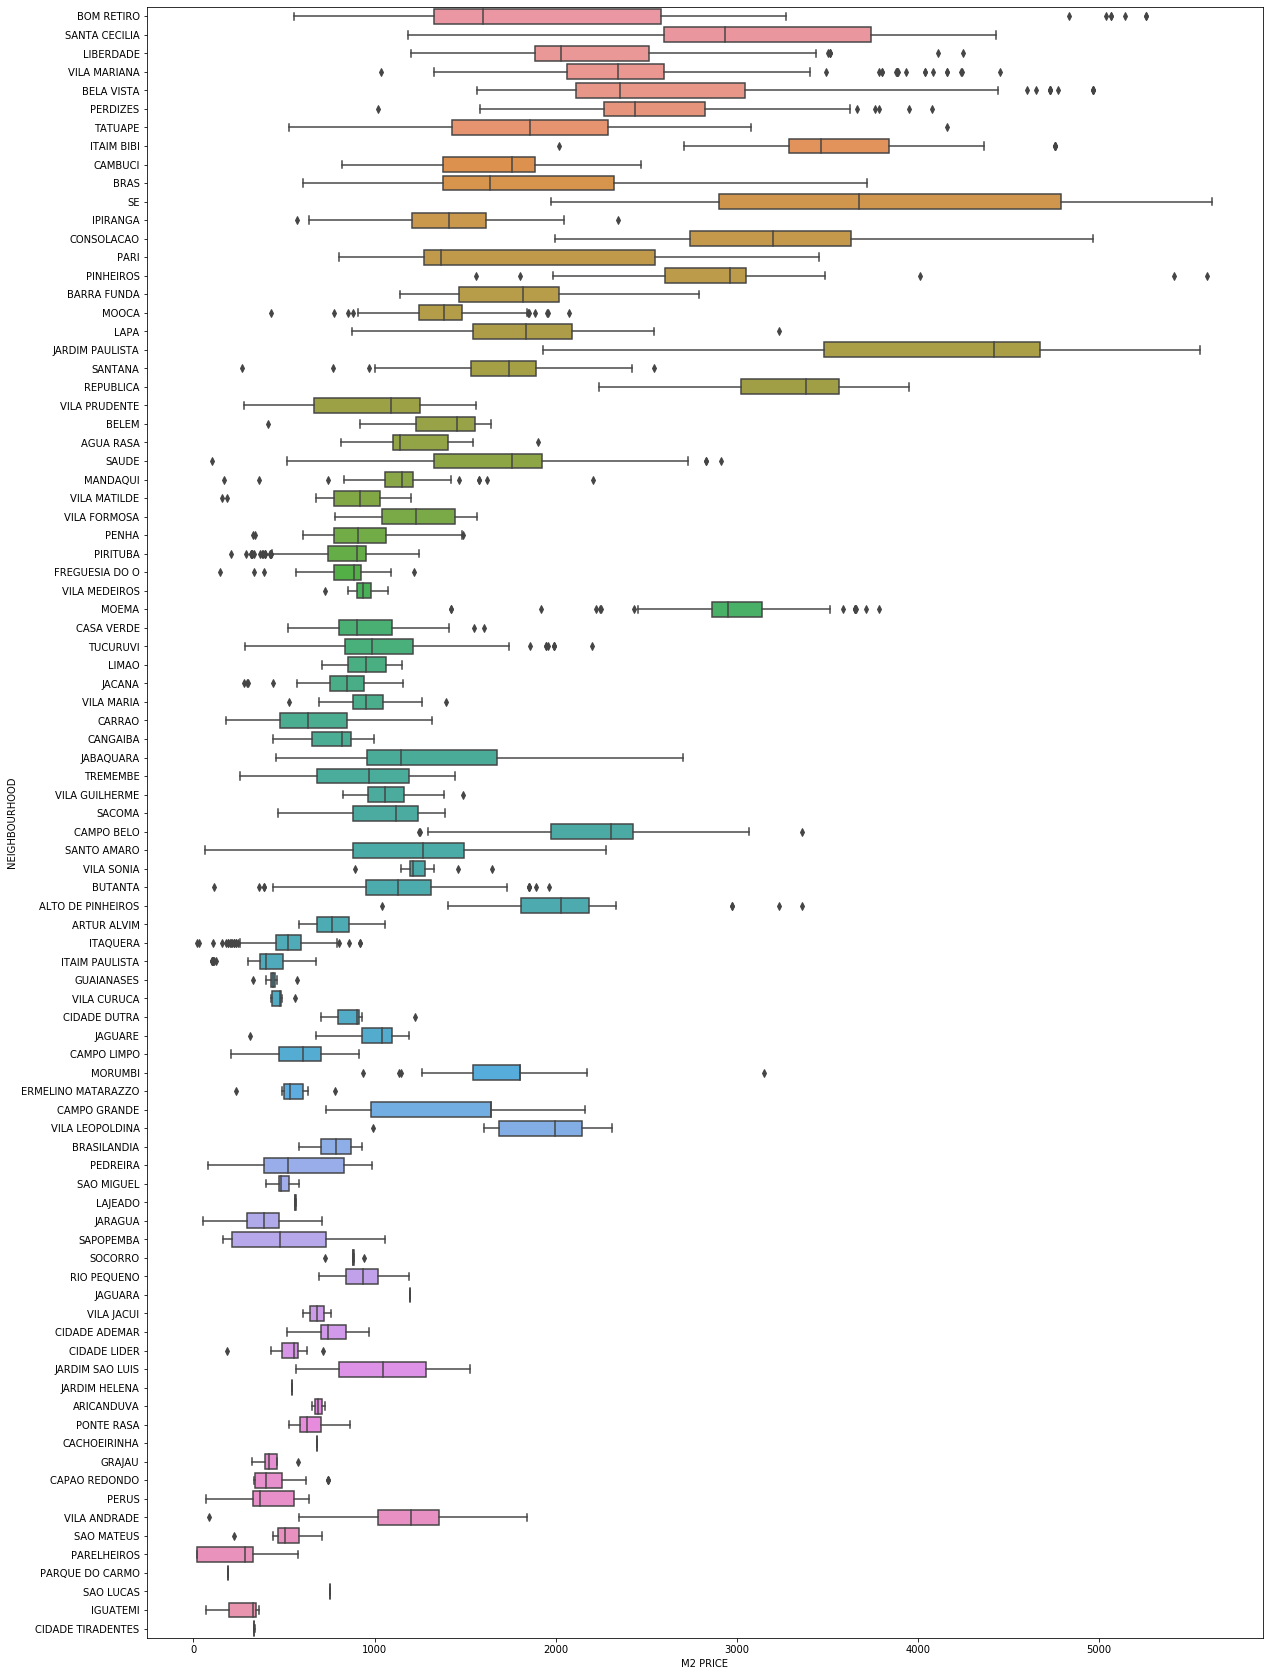

In [38]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

neighbourhoodPricesDF = landvalueDF[['M2 PRICE', 'NEIGHBOURHOOD']]
neighbourhoodPricesDF = remove_outlier(neighbourhoodPricesDF, 'M2 PRICE')

plt.figure(figsize=(20, 30))
sns.boxplot(x="M2 PRICE", y="NEIGHBOURHOOD", data=neighbourhoodPricesDF);

### Get mean value for each district

In [39]:
meanLandvalueDF = landvalueDF.groupby(landvalueDF['NEIGHBOURHOOD'], as_index=False)['M2 PRICE'].mean()
meanLandvalueDF.sort_values('M2 PRICE', ascending=False).head(10)

NEIGHBOURHOOD     M2 PRICE
40  JARDIM PAULISTA  4272.683594
71               SE  3958.733333
5        BELA VISTA  3801.847973
31       ITAIM BIBI  3638.891566
24       CONSOLACAO  3225.273026
60        REPUBLICA  3205.892857
63    SANTA CECILIA  3060.257463
57        PINHEIROS  3031.581633
47            MOEMA  2987.632353
55         PERDIZES  2546.111321

## Get Venues from Foursquare

### Get Districts Centroid Coordinates

In [42]:
with open('districts.geojson', "w") as file:
    file.write(json.dumps(geojson))
zones = gpd.read_file('districts.geojson')

for i in range(0,len(geojson['features'])):
    zones.loc[i,'centroid_lon'] = zones.geometry.centroid.x.iloc[i]
    zones.loc[i,'centroid_lat'] = zones.geometry.centroid.y.iloc[i]

In [43]:
zones

cartodb_id   id mun_sigla   mun_nome   cod_ibge sigla            nome  \
0           34   22       SAO  SAO PAULO  355030807   BVI      Bela Vista   
1           38   24       SAO  SAO PAULO  355030849   LIB       Liberdade   
2           42  259       SAO  SAO PAULO  355030856   PRI            Pari   
3           21   30       SAO  SAO PAULO  355030853   MOO           Mooca   
4            8    3       SAO  SAO PAULO  355030883   VAN    Vila Andrade   
..         ...  ...       ...        ...        ...   ...             ...   
91          68   68       SAO  SAO PAULO  355030875   SRA      São Rafael   
92          72   72       SAO  SAO PAULO  355030847   JBO  José Bonifácio   
93          76   76       SAO  SAO PAULO  355030874   SMI      São Miguel   
94          86   86       SAO  SAO PAULO  355030830   GRA          Grajaú   
95          94   94       SAO  SAO PAULO  355030884   VCR     Vila Curuçá   

          nomecaps  incidencia  \
0       BELA VISTA         8.5   
1        LIBERDADE         7.1   
2             PARI        16.4   
3            MOOCA         5.1   
4     VILA ANDRADE         2.2   
..             ...         ...   
91      SAO RAFAEL         1.3   
92  JOSE BONIFACIO         1.6   
93      SAO MIGUEL         2.2   
94          GRAJAU         2.4   
95     VILA CURUCA         5.3   

                                             geometry  centroid_lon  \
0   (POLYGON ((-46.648614 -23.567189, -46.653394 -...    -46.647027   
1   (POLYGON ((-46.640735 -23.572888, -46.640488 -...    -46.631528   
2   (POLYGON ((-46.624928 -23.519002, -46.623455 -...    -46.617179   
3   (POLYGON ((-46.603601 -23.566726, -46.604565 -...    -46.596134   
4   (POLYGON ((-46.727635 -23.61106, -46.721546 -2...    -46.728013   
..                                                ...           ...   
91  (POLYGON ((-46.481316 -23.62362, -46.480175 -2...    -46.453749   
92  (POLYGON ((-46.444185 -23.592224, -46.444032 -...    -46.432281   
93  (POLYGON ((-46.432242 -23.526097, -46.432606 -...    -46.440456   
94  (POLYGON ((-46.634554 -23.835793, -46.636794 -...    -46.668468   
95  (POLYGON ((-46.435568 -23.490765, -46.406872 -...    -46.415441   

    centroid_lat  
0     -23.560400  
1     -23.566521  
2     -23.526806  
3     -23.560910  
4     -23.625839  
..           ...  
91    -23.627827  
92    -23.567047  
93    -23.500804  
94    -23.789118  
95    -23.509540  

[96 rows x 12 columns]

### Plot map with districts and centroids

In [44]:
for lat, long in zip(zones['centroid_lat'], zones['centroid_lon']):      
    folium.CircleMarker(
        [lat, long],
        radius = 3,
        fill = True,
        fill_opacity = 0.5,        
    ).add_to(map) 
map

### Load Venues close to each centroid

In [45]:
# The code was removed by Watson Studio for sharing.

In [64]:
geojson['features'][0]['geometry']['coordinates']

[[[[-46.648614, -23.567189],
   [-46.653394, -23.563265],
   [-46.65861, -23.558781],
   [-46.655482, -23.554765],
   [-46.6554, -23.554698],
   [-46.650411, -23.552023],
   [-46.649904, -23.551756],
   [-46.647387, -23.550947],
   [-46.646899, -23.551161],
   [-46.646683, -23.550765],
   [-46.646456, -23.550576],
   [-46.646039, -23.550397],
   [-46.645077, -23.552982],
   [-46.644912, -23.553369],
   [-46.644738, -23.553642],
   [-46.64446, -23.553888],
   [-46.644176, -23.554064],
   [-46.642248, -23.554803],
   [-46.64161, -23.554973],
   [-46.639819, -23.555266],
   [-46.639603, -23.555888],
   [-46.639253, -23.55536],
   [-46.637277, -23.555709],
   [-46.638272, -23.558304],
   [-46.638481, -23.558662],
   [-46.639175, -23.559671],
   [-46.639494, -23.560322],
   [-46.639639, -23.560699],
   [-46.6397, -23.561077],
   [-46.639896, -23.562973],
   [-46.640081, -23.563963],
   [-46.640287, -23.564878],
   [-46.640318, -23.565576],
   [-46.640246, -23.566359],
   [-46.640215, -23.56

In [78]:
def get_polygon_str(geometry) :
    rtn = ''
    for i in range(0,len(geometry['coordinates'][0][0])):
        rtn += str(geometry['coordinates'][0][0][i][0]) + ',' + str(geometry['coordinates'][0][0][i][1]) + ';'
    return rtn[:-1]

In [71]:
len(geojson['features'][0]['geometry']['coordinates'])

1

In [79]:
geometry_str = urllib.parse.quote(get_polygon_str(geojson['features'][0]['geometry']))
geometry_str

'-46.648614%2C-23.567189%3B-46.653394%2C-23.563265%3B-46.65861%2C-23.558781%3B-46.655482%2C-23.554765%3B-46.6554%2C-23.554698%3B-46.650411%2C-23.552023%3B-46.649904%2C-23.551756%3B-46.647387%2C-23.550947%3B-46.646899%2C-23.551161%3B-46.646683%2C-23.550765%3B-46.646456%2C-23.550576%3B-46.646039%2C-23.550397%3B-46.645077%2C-23.552982%3B-46.644912%2C-23.553369%3B-46.644738%2C-23.553642%3B-46.64446%2C-23.553888%3B-46.644176%2C-23.554064%3B-46.642248%2C-23.554803%3B-46.64161%2C-23.554973%3B-46.639819%2C-23.555266%3B-46.639603%2C-23.555888%3B-46.639253%2C-23.55536%3B-46.637277%2C-23.555709%3B-46.638272%2C-23.558304%3B-46.638481%2C-23.558662%3B-46.639175%2C-23.559671%3B-46.639494%2C-23.560322%3B-46.639639%2C-23.560699%3B-46.6397%2C-23.561077%3B-46.639896%2C-23.562973%3B-46.640081%2C-23.563963%3B-46.640287%2C-23.564878%3B-46.640318%2C-23.565576%3B-46.640246%2C-23.566359%3B-46.640215%2C-23.567312%3B-46.640488%2C-23.570322%3B-46.640735%2C-23.572888%3B-46.641486%2C-23.572605%3B-46.642697%2C-23.57

In [80]:
LIMIT=1000
radius = 3000
geometry_str = urllib.parse.quote(get_polygon_str(geojson['features'][0]['geometry']))
#for lat, lon in zip(zones['centroid_lat'], zones['centroid_lon']): 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&polygon={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    geometry_str, 
    LIMIT)
#results = requests.get(url).json()
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MBLG0GXG1YLBHH2PW1JVEOEHF2EZEUOHAHFSTSEQPZWYVSLK&client_secret=QT4CBHY1WBX4PCG5TOPPRE1SFOGD3JKZC1PXDTSXWAK3FPJF&v=20190701&polygon=-46.648614%2C-23.567189%3B-46.653394%2C-23.563265%3B-46.65861%2C-23.558781%3B-46.655482%2C-23.554765%3B-46.6554%2C-23.554698%3B-46.650411%2C-23.552023%3B-46.649904%2C-23.551756%3B-46.647387%2C-23.550947%3B-46.646899%2C-23.551161%3B-46.646683%2C-23.550765%3B-46.646456%2C-23.550576%3B-46.646039%2C-23.550397%3B-46.645077%2C-23.552982%3B-46.644912%2C-23.553369%3B-46.644738%2C-23.553642%3B-46.64446%2C-23.553888%3B-46.644176%2C-23.554064%3B-46.642248%2C-23.554803%3B-46.64161%2C-23.554973%3B-46.639819%2C-23.555266%3B-46.639603%2C-23.555888%3B-46.639253%2C-23.55536%3B-46.637277%2C-23.555709%3B-46.638272%2C-23.558304%3B-46.638481%2C-23.558662%3B-46.639175%2C-23.559671%3B-46.639494%2C-23.560322%3B-46.639639%2C-23.560699%3B-46.6397%2C-23.561077%3B-46.639896%2C-23.562973%3B-46.640081%2C-23.563963%3B-46.640287%2C-

In [40]:
LIMIT=1000
radius = 3000

#for lat, lon in zip(zones['centroid_lat'], zones['centroid_lon']):  
&polygon=37.80463017025873%2C-122.42786407470703%3B37.802595683318046%2C-122.42374420166016%3B37.798662182986945%2C-122.42219924926756%3B37.79676317682161%2C-122.43009567260741%3B37.79255806087506%2C-122.43919372558592%3B37.79255806087506%2C-122.44314193725585%3B37.79513541839677%2C-122.44588851928712%3B37.803273851858656%2C-122.44709014892577%3B37.80286695148153%2C-122.44279861450195%3B37.805850835522065%2C-122.43370056152344%3B37.80463017025873%2C-122.42786407470703
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zones.loc[0]['centroid_lat'], 
    zones.loc[0]['centroid_lon'], 
    radius, 
    LIMIT)
#results = requests.get(url).json()
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MBLG0GXG1YLBHH2PW1JVEOEHF2EZEUOHAHFSTSEQPZWYVSLK&client_secret=QT4CBHY1WBX4PCG5TOPPRE1SFOGD3JKZC1PXDTSXWAK3FPJF&v=20190701&ll=-23.56040027667004,-46.64702724763833&radius=3000&limit=1000'

In [44]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [82]:
url
# results = requests.get(url).json()
# results['response']
# venues = results['response']['groups'][0]['items']
    
# nearby_venues = json_normalize(venues) # flatten JSON

# # filter columns
# filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
# nearby_venues =nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# # clean columns
# nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# nearby_venues.head(100)

'https://api.foursquare.com/v2/venues/explore?&client_id=MBLG0GXG1YLBHH2PW1JVEOEHF2EZEUOHAHFSTSEQPZWYVSLK&client_secret=QT4CBHY1WBX4PCG5TOPPRE1SFOGD3JKZC1PXDTSXWAK3FPJF&v=20190701&polygon=-46.648614%2C-23.567189%3B-46.653394%2C-23.563265%3B-46.65861%2C-23.558781%3B-46.655482%2C-23.554765%3B-46.6554%2C-23.554698%3B-46.650411%2C-23.552023%3B-46.649904%2C-23.551756%3B-46.647387%2C-23.550947%3B-46.646899%2C-23.551161%3B-46.646683%2C-23.550765%3B-46.646456%2C-23.550576%3B-46.646039%2C-23.550397%3B-46.645077%2C-23.552982%3B-46.644912%2C-23.553369%3B-46.644738%2C-23.553642%3B-46.64446%2C-23.553888%3B-46.644176%2C-23.554064%3B-46.642248%2C-23.554803%3B-46.64161%2C-23.554973%3B-46.639819%2C-23.555266%3B-46.639603%2C-23.555888%3B-46.639253%2C-23.55536%3B-46.637277%2C-23.555709%3B-46.638272%2C-23.558304%3B-46.638481%2C-23.558662%3B-46.639175%2C-23.559671%3B-46.639494%2C-23.560322%3B-46.639639%2C-23.560699%3B-46.6397%2C-23.561077%3B-46.639896%2C-23.562973%3B-46.640081%2C-23.563963%3B-46.640287%2C-

In [47]:
for lat, long in zip(nearby_venues['lat'], nearby_venues['lng']):      
    folium.CircleMarker(
        [lat, long],
        radius = 2,
        color='crimson',
        fill = True,
        fill_opacity = 0.5,        
    ).add_to(map) 
map